# Introduction to Machine Learning

**Make sure you save a copy of this lab on your own drive before starting the lab!**

## Overview

In this lab, you will learn about the following:

*   Difference between supervised and unsupervised learning tasks, and common algorithms
*   Performing data preparation
*   Using the [Scikit-learn](https://scikit-learn.org/stable/) library to perform classification and regression
*   Performing validation and model selection
*   Using the [Matplotlib](https://matplotlib.org/) library to visualize the data


## 1. Supervised vs Unsupervised Learning

Many machine learning tasks can be broadly categorized as supervised or unsupervised learning. The differences between these kinds of learning are:

||Supervised Learning|Unsupervised Learning|
|---|:---:|:---:|
|**Learning Objective**|Given examples with input (**attributes/features**) and output (**labels**), find a mapping |Given data, find a representation|
|**Application**|Predict labels given unlabelled examples|Find structure in data, summarize data|
|**Training Data**|Has explicit labels|Has no explicit labels|

In supervised learning, the main techniques are:

*   **Classification**
    * Predict the class label (discrete value) of an example
    * The class label can be binary (e.g. spam/non-spam emails) or multi-class (e.g. types of dogs)
    * Common classification algorithms include: K-Nearest Neighbor (KNN), Support Vector Machine (SVM), Decision Tree, Naive Bayes, etc.
*   **Regression**
    * Predict a continuous value
    * Regression models differ in their *loss functions* (e.g., Log Loss Function, Huber Loss Function, Lasso and Ridge Loss Functions) and *optimizers* (e.g., (Stochastic) Gradient Descent, Levenberg-Marquardt, Non-linear Conjugate Gradient). While details about what loss functions and optimizers are are not covered the most rigorously in the course, we recommend you looking them up to get a feel for what types of regression you should use for your final project, if applicable!
    * Common regression algorithms include: Linear Regression, Bayesian Linear Regression, Logistic Regression, Elastic Net Regression, Polynomial Linear Regression, Non-linear Regression, Poisson Regression

Some key techniques of unsupervised learning are:
* **Clustering**
    * Find a grouping of the data
    * Common clustering algorithms include: K Means, Expectation-Maximization (EM), Hierachical Clustering
* **Dimensionality Reduction**
    * Transform data from a high-dimension space (i.e. more attributes) to a low-dimension space
    * This technique can be used for noise reduction, data visualization, or as an intermediate step in other machine learning tasks
    * The main technique of dimensionality reduction is Principle Component Analysis (PCA)



### <font color='green'>Checkoff Question 1 - Machine Learning Techiques</font>

Which of the machine learning techniques above (classification, regression, clustering, dimensionality reduction) should be used for the following scenarios?



1.   Categorizing customers into similar groups based on their shopping history
2.   Determining whether an image shows [a puppy or a bagel](https://static.boredpanda.com/blog/wp-content/uploads/2016/03/dog-food-comparison-bagel-muffin-lookalike-teenybiscuit-karen-zack__700.jpg)
3.   Predicting the number of Covid-19 cases in a region based on vaccination rates
4.   Visualizing a dataset with 10 attributes within a two-dimensional graph

**Double-click the cell below and replace the question marks with your answers. You should be able to explain to the TA your choices.**

**Your answers:**

1.   ???
2.   ???
3.   ???
4.   ???

## 2. Classification - K-Nearest Neighbor

In this lab, we will be using K-Nearest Neighbors, a simple algorithm that uses the labels of the *k* closest training examples (i.e. examples with the most similar attribute values) to predict the label of a test example. The KNN algorithm has the advantages of being easily intrepretable and requiring no "training" (training examples are used to predict the labels of test examples at test time). 

We will be using the [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/Iris), where each example has **four attributes** (sepal length, sepal width, petal length, petal width) and belong to one of **three classes** (*Iris Setosa*, *Iris Versicolour*, *Iris Virginica*).

In [ ]:
from sklearn import neighbors, datasets
import pandas as pd

# Load dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
print ("Sample y values:", y[:5])
X.head()

Sample y values: [0 0 0 0 0]


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

### 2.1 Data Preparation

Before we start training our model, we need to preprocess the data to ensure that it can be used by the classifier, which usually takes in examples as vectors. To reduce the complexity of the model and prevent overfitting, we also sometimes remove features from the model before training. Common data preparation tasks include:

*   **Dropping or replacing missing values**
    * Missing values can be replaced with the mean/mode of all examples or similar examples, or by using a function
*   **Normalization**
    * Normalization involves scaling the features such that they share the same scale (usually 0 to 1)
    * This step is often important to improve the training accuracy of the model
    * Common methods or normalization include: min-max scaling, standardization/z-score 
*   **Converting to numeric features**
    * Binary features - e.g. eyes/no eyes
        * Assign one value to 1 and the other value to 0
    * Categorical features - e.g. red, blue, green
        * Perform one-hot encoding - map each value to new feature, and set that feature to 1 if an example has that value
        * E.g. an example with the color red will have 1 for "red", and 0 for "blue" and "green"
    * Ordinal features - e.g. large, medium, small
        * Assign each value to a feature, and set each feature to 1 up to and including the largest value
        * E.g. an example with the size medium will have 1 for "small" and "medium", and 0 for "large"
*   **Feature selection**
    * Remove one of two highly correlated features
    * Remove features with low variance in their values
    * Keep only features with high information gain
    * Perform dimensionality reduction

### <font color='green'>Checkoff Question 2 - Data Preparation</font>

We will first remove one of the four attributes to reduce the complexity of the model and prevent overfitting. We plot the correlation matrix between the features.

In [ ]:
X.corr()

sepal length (cm)  ...  petal width (cm)
sepal length (cm)           1.000000  ...          0.817941
sepal width (cm)           -0.117570  ...         -0.366126
petal length (cm)           0.871754  ...          0.962865
petal width (cm)            0.817941  ...          1.000000

[4 rows x 4 columns]

Which two features are highly correlated with each other? **Replace the question marks below with the name of a column to remove either one of them.**

In [ ]:
X = X.drop(columns="???") #TODO: Change the "???" to be one of the column names!
assert (X.shape == (150,3))
X.head()

sepal length (cm)  sepal width (cm)  petal length (cm)
0                5.1               3.5                1.4
1                4.9               3.0                1.4
2                4.7               3.2                1.3
3                4.6               3.1                1.5
4                5.0               3.6                1.4

Besides implementing different machine learning classifiers, Scikit-learn also provides tools for data preprocessing. Use the Scikit-learn library to perform [min-max scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) on the features. **Replace the question marks below.** `norm` should be a 150 x 3 array containing the normalized values.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Hint: initialize a MinMaxScalar, and fit and transform the data, X
scaler = ??? #TODO: Change ??? into a MinMaxScaler object!
norm = ??? #TODO: Getting the normalized values (150x3 array)

X = pd.DataFrame(norm, columns=X.columns)
assert(X['sepal length (cm)'].max() == X['sepal width (cm)'].max() == 1)
assert(X['sepal length (cm)'].min() == X['sepal width (cm)'].min() == 0)
X.head()

sepal length (cm)  sepal width (cm)  petal length (cm)
0           0.222222          0.625000           0.067797
1           0.166667          0.416667           0.067797
2           0.111111          0.500000           0.050847
3           0.083333          0.458333           0.084746
4           0.194444          0.666667           0.067797

### 2.2 Train Test Split

Given some training data, a supervised machine learning algorithm will attempt to learn a model that maps the input (i.e. features) to the output (i.e. label) in a way that minimizes the error. As we would eventually want to use the model to make predictions on new and unseen data, it is insufficient for the model to achieve low error on the training data. Instead, we need a way to evaluate its performance on unobserved data that it has not been trained on.

To do so, we split the labelled data that we have into a training set and a test test. The **training data** is used by the algorithm to learn a new model, while the **test data** is used to evaluate how well this model generalizes to new data that is not included in the training set. If the model has a low test error, we can be more certain that it will be able to predict unlabelled real-world data accurately. 

Additionally, we sometimes also create a separate **validation set** to help us finetune the model and determine the best hyperparameters for the model. Validation and model selection will be covered in more detail in **Section 2.4**.

There is no fixed ratio for the split between training, validation, and test data, but we generally want to have more training data so that is model can perform well on a wider range of data. It is important that we split the data into these subsets randomly and without repetition. 

In our example, we will split our data into 60% training, 20% validation, and 20% test.

### <font color='green'>Checkoff Question 3 - Train Test Split</font>

We use the Scikit-learn library to help us with the [train test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). We have created a training set with 60% of the examples. **Replace the question marks below to create validation and test sets containing 20% of the examples each.**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size = 0.4, random_state = 1)
print("Train set:", X_train.shape, y_train.shape)

# Hint: split X_valtest and y_valtest into sets of the same size
# Set random_state to be 1 for reproducibility for grading purposes
X_val, X_test, y_val, y_test = ??? #TODO: Change the ??? to be the right values
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

assert(X_val.shape == X_test.shape == (30,3))
assert(y_val.shape == y_test.shape == (30,))

Train set: (90, 3) (90,)
Validation set: (30, 3) (30,)
Test set: (30, 3) (30,)


### 2.3 Training and Prediction

We set *k*, the number of nearest neighbors, as 4 for now. We use the [KNN classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) in Scikit-learn to train the model on the training set. The model is used to predict the labels of the test set and its accuracy is [evaluated using Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 4
# Train model
KNN = KNeighborsClassifier(k).fit(X_train, y_train)

# Predict test set
yhat = KNN.predict(X_test)
print(yhat[:5])

# Evaluate accuracy of model
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNN.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

[2 0 1 0 0]
Train set Accuracy:  0.9666666666666667
Test set Accuracy:  0.9333333333333333


### 2.4 Validation and Model Selection

One of the key problems in machine learning is the **bias-complexity tradeoff**. While this is a huge topic on its own, the tradeoff can be briefly summarized as such:
*   **Complexity**
    * The complexity of a model describes how complicated the function it can represent is. Using regression as an example, a polynomial regression model is more complex than a linear regression model, as it is able to represent a more complicated function and fit data points more closely.
    * Having a model that is too complex can lead to **overfitting** and result in poor test accuracy, as the model does not generalize well to unobserved data.
*   **Bias**
    * When we choose a specific machine learning algorithm, we in effect limit the complexity of the model that can be learned based on our prior knowledge of the data. For instance, if we believe that the data is represented by a linear regression line, we would choose the best model from all possible linear regression models, instead of exploring all regression models.
    * Having a model that is too biased can lead to **underfitting**. If the data is actually better modelled by a polynomial curve instead of a linear regression line, we will not be able to learn an accurate model if we only look at linear regression models. 

This diagram demonstrates the bias-complexity-tradeoff visually (source: [Machine Learning @ Berkeley](https://medium.com/@ml.at.berkeley/machine-learning-crash-course-part-4-the-bias-variance-dilemma-a94e60ec1d3)):

![](https://miro.medium.com/max/1050/1*GAdJ1wmrLdNLoGwqR2blZg.png)

Even after we have decided on a specific class of models, e.g. KNN, SVM, etc., there are often other parameters that we can choose to manage the tradeoff between bias and complexity, which we call **hyperparameters**. In KNN, *k*, the number of nearest neighbors, is a hyperparameter. A *k* of 1 gives the most complex model, as each example will be labelled based on its nearest example. A *k* equal to the total number of training examples is the least complex, as all examples will simply be labelled with the majority label. 

### <font color='green'>Checkoff Question 4 - Validation and Model Selection</font>

This is where our validation set comes in. After we learn models with different hyperparameters on the same training set, we use the validation data to select the best model. **Replace the question marks below to train KNN models with k between 1 and 10, and calculate their accuracy.**

In [ ]:
ks = range(1,11)
train_accs = []
val_accs = []

for k in ks:
  # Hint: train model with number of neighbors as k
  KNN = ??? #TODO: Fill in the right answer for ???

  # Hint: predict validation set
  yhat = ??? #TODO: Fill in the right answer for ???

  train_accs.append(metrics.accuracy_score(y_train, KNN.predict(X_train)))
  # Hint: calculate and append validation accuracy
  val_accs.append(???) #TODO: Fill in the right answer for ???

To determine the *k* value that gives the best performance, we plot the training and validation accuracies. Notice how the training error decreases as *k* decreases; *k* = 1 gives 100% accuracy, as we are effectively predicting the label of each training example based on its own label. 

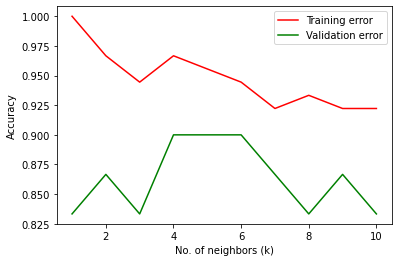

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ks, train_accs, 'r', ks, val_accs, 'g')
plt.ylabel("Accuracy")
plt.xlabel("No. of neighbors (k)")
plt.legend(['Training error','Validation error'])
plt.show()

Choose *k* as the largest value between 1 and 10 that gives the highest validation error. **Replace the question marks below to calculate the accuracy of this model.**

In [ ]:
k = ? #TODO: Choose the k that would give the highest validation error

# Train model
KNN = ??? #TODO: Fill in the right answer for ???

# Predict test set
yhat = ??? #TODO: Fill in the right answer for ???
print(yhat[:5])

# Evaluate accuracy of model
train_acc = ??? #TODO: Fill in the right answer for ???
test_acc = ??? #TODO: Fill in the right answer for ???

print("Train set Accuracy: ", train_acc)
print("Test set Accuracy: ", test_acc)

assert (train_acc == 0.9444444444444444)
assert (test_acc == .9333333333333333)

[2 0 1 0 0]
Train set Accuracy:  0.9444444444444444
Test set Accuracy:  0.9333333333333333


## 3. Regression

In the last part of this lab, we will be performing linear regression to predict a continuous output label for each example using its features. **Note that because what we're trying to predict is a continuous label, we can't use a classification algorithm like K-Nearest Neighbor like above.**

We will be using the [Boston House-Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/), where each example has **13 attributes** (e.g. per capita crime rate, average number of rooms per dwelling) and a label that gives the medium value of homes. 

In [ ]:
# Load dataset
boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
print ("Sample y values:", y[:5])
X.head()

Sample y values: [24.  21.6 34.7 33.4 36.2]


CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

### <font color='green'>Checkoff Question 5 - Simple Linear Regression</font>

In our example, we perform simple linear regression using only one attribute, `INDUS` (Proportion of non-retail business acres per town) to predict the output label `MEDV` (Median value of owner-occupied homes in $1000s). 

**Replace the question marks below to do a 80/20 split of the data into training and test sets.**

In [ ]:
# We choose just one feature, INDUS, to perform simple linear regression
X = X['INDUS']

# Use train_test_split to split the data
# Set random_state to be 0 for reproducibility for grading purposes
X_train, X_test, y_train, y_test = ??? #TODO: Fill in the right answers for ???


print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

assert(X_train.shape == y_train.shape == (404,))
assert(X_test.shape == y_test.shape == (102,))

Train set: (404,) (404,)
Test set: (102,) (102,)


We use Scikit-learn's [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to perform simple linear regression. **Replace the question marks below to fit the model.**

In [ ]:
from sklearn.linear_model import LinearRegression

# Convert to df 
X_train = X_train.to_frame()
X_test = X_test.to_frame()

# Hint: initialize a LinearRegression classifier and fit the training data
reg = ???.??? #TODO: Fill in the right answers for ???

# Print the coefficient and intercept
print(reg.coef_)
print(reg.intercept_)

[-0.6936726]
30.327907185831464


We can use the R-squared value to determine how well the linear regression model fits the data. A R-squared value closer to 1 indicates a better fit.   Note that our R-squared value is low as we are only using one feature. Using a multiple linear regression model with more features will improve the R-squared value. **Replace the question marks below to predict the values of the test data and calculate the test R-squared.**

In [ ]:
# Print training R-squared
print('Training R-squared:', reg.score(X_train, y_train))

# Predict test values
yhat = ??? #TODO: Fill in the right answer for ???
print(yhat[:5])

# Print testing R-squared
testing_r = ??? #TODO: Fill in the right answer for ???
print('Testing R-squared:', testing_r)

assert (yhat[0] == 28.08040795021362)
assert (testing_r == 0.054027642748776805)

Training R-squared: 0.2756821153366341
[28.08040795 17.77243306 20.69279472 17.77243306 21.42808768]
Testing R-squared: 0.054027642748776805


### 3.1 Visualization of results

A good way to get an intuitive understanding of how well a machine learning model fits the data is to visualize the training and test data. 

To visualize how well the linear regression model fits the data, we can create a scatter plot of the data points and plot the regression line.

coef:  -0.6936726035857542
intercept:  30.327907185831464


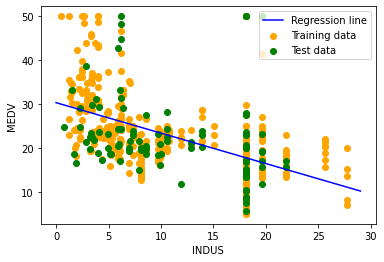

In [ ]:
import numpy as np

# Get the coef and intercept values (y=mx+b)
m = reg.coef_[0]
b = reg.intercept_
print("coef: ", m)
print("intercept: ", b)

# Scatter plot
plt.scatter(X_train, y_train, color= 'orange')
plt.scatter(X_test, y_test, color = 'green')

# Regression plot
x = np.arange(0,30)
plt.plot(x, m*x+b, 'blue')

plt.xlabel("INDUS")
plt.ylabel("MEDV")
plt.legend(["Regression line", "Training data", "Test data"])
plt.show()

Other useful python libraries that you can use to create richer visualizations include:
* [Seaborn](https://seaborn.pydata.org/): similar to Matplotlib, but allows nicer visualizations to be created with less code
* [Plotly](https://plotly.com/python/): interactive graphs
* [Folium](http://python-visualization.github.io/folium/): visualization of geospatial data on an interactive map

## Credit
Developed by Jian Cong (jloh4) in Summer 2021.